4 2 1 13396.202764483856


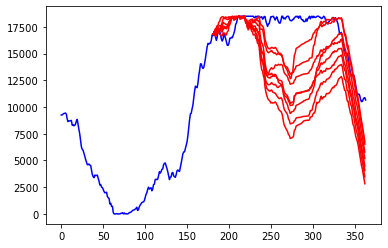

In [26]:
from os.path import exists
import matplotlib.pyplot as plt

first_stage__probs = (0.0, 0.25, 0.5, 0.75, 1.0)
second_stage__probs = (0.0, 0.25, 0.5, 0.75, 1.0)

for fp in (4,):
    for sp in (2,):
        scaling = 1
        x = []
        y = []

        filename = '/Users/wolframwiesemann/Desktop/out-of-sample.txt'
        if not exists (filename):
            print (filename + ' does not exist')
            continue
            
        with open(filename) as f:
            lines = f.readlines()
        
        spot_revenues = 0.0
        reserve_up_revenues = 0.0
        reserve_down_revenues = 0.0
        first_round_success_up = 0.0
        first_round_success_down = 0.0
        second_round_freq_up = 0.0
        second_round_freq_down = 0.0
        curr_day = 0
        #success = 0
        
        spot_investment = 0.0
        rup_investment = 0.0
        rdown_investment = 0.0

        spot_water = 0.0
        rup_water = 0.0
        rdown_water = 0.0
        
        while len(lines) > 0:
            day = lines.pop(0)
            violations = lines.pop(0)
            #success += int(lines.pop(0))
            water_levels = lines.pop(0).split(' ')
            water_values = lines.pop(0).split(' ')
            target_end_of_day_water_levels = lines.pop(0).split(' ')
            gen_pump_spill = lines.pop(0) # generation pump and spill throughout the day

            for i in range (24):
                market_data = lines.pop(0) # market data
                market_data = market_data.strip().replace ('  ', ' ').split(' ')
                
                spot_revenues += float(market_data[1])
                reserve_up_revenues += float(market_data[7])
                reserve_down_revenues += float(market_data[13])
                                
                first_round_success_up += float(market_data[3])
                second_round_freq_up += float(market_data[4])
                first_round_success_down += float(market_data[9])
                second_round_freq_down += float(market_data[10])
 
                spot_investment += float(market_data[0])
                rup_investment += float(market_data[2])
                rdown_investment += float(market_data[8])

                spot_water += float(market_data[0])
                rup_water += float(market_data[2]) * float(market_data[3]) * float(market_data[4])
                rdown_water += float(market_data[8]) * float(market_data[9]) * float(market_data[10])


            lines.pop(0) # end-of-day reservoir levels
            lines.pop(0) # empty line
        
            total_revenues_to_date = spot_revenues + reserve_up_revenues + reserve_down_revenues

            x += [ curr_day ]
            y += [ float(water_levels[0]) ]

            curr_day = curr_day + 1

        print (fp, sp, scaling, total_revenues_to_date) #, spot_revenues, reserve_up_revenues, reserve_down_revenues)

        plt.plot (x, y, 'b')

from pandas import *

data = read_csv ("/Users/wolframwiesemann/Desktop/water_levels__master_problem__day_182.csv")
x2 = []
for i in range (182):
    x2 += [ 181 + i ]

plt.plot (x2, data["w0"].tolist()[:182], 'r')
plt.plot (x2, data["w1"].tolist()[:182], 'r')
plt.plot (x2, data["w2"].tolist()[:182], 'r')
plt.plot (x2, data["w3"].tolist()[:182], 'r')
plt.plot (x2, data["w4"].tolist()[:182], 'r')
plt.plot (x2, data["w5"].tolist()[:182], 'r')
plt.plot (x2, data["w6"].tolist()[:182], 'r')
plt.plot (x2, data["w7"].tolist()[:182], 'r')
plt.plot (x2, data["w8"].tolist()[:182], 'r')

plt.savefig ('/Users/wolframwiesemann/Desktop/predictive-accuracy-day-182.pdf')
plt.show()

import csv

with open('/Users/wolframwiesemann/Desktop/predictive-accuracy-day-182.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(zip(x, y, data["w0"].tolist(), data["w1"].tolist(), data["w2"].tolist(), data["w3"].tolist(), data["w4"].tolist(), data["w5"].tolist(), data["w6"].tolist(), data["w7"].tolist(), data["w8"].tolist()))